In [1]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('C:/Users/jlmar/OneDrive/Escritorio/House_Renting_Alicante/Alicante_individual.csv',
                 sep = ';', encoding = 'utf-8')

#Adding a price per square meter column
df['price_m2'] = (df['price']/df['m2_builded']).round(2)


In [3]:
#After making a little investigation you can fin some outliers or some inconsistencies
#This is just an example, but you should revisit it each time you generte the DB.


#Get rid off the outliers

#first oulier
ol_1 = df[df['bathrooms'] == 52]

#second outlier 

ol_2 = df[df['bathrooms'] == 7]

#We drop both of them

df = df.drop(ol_1.index)

df = df.drop(ol_2.index)

#Dropping some duplicates

dup_l = [100033224, 100063130, 98937225, 84694492,85000665, 99711959,99892003]

for dup in dup_l:
    
    dupl = df[df['idealista_id'] == dup]

    df = df.drop(dupl.index)




In [5]:
df.head()

,idealista_id,bedrooms,bathrooms,floor,elevator,terrace,balcony,garaje,built_in_wardrobe,air_conditioning,...,green_zone,price,furnished,equiped_kitchen,street,neighborhood,district,m2_builded,m2_habitable,price_m2
0,100004246.0,3,2,Planta 3ª exterior,N,N,Y,N,Y,Y,...,N,1800,Y,Y,pintor Velázquez,Barrio Mercado,Distrito Centro,125,110.0,14.40
1,100010363.0,1,1,Planta 1ª exterior,Y,Y,N,Y,Y,Y,...,N,680,Y,Y,Calle de la Nasa,Barrio Cabo de las Huertas,Distrito Playa de San Juan-El Cabo,50,NaN,13.60
2,100027994.0,2,2,Planta 6ª exterior,Y,N,N,N,N,Y,...,N,1150,N,N,"Calle Girona, 16",Barrio Centro Tradicional,Distrito Centro,77,68.0,14.94
3,100028067.0,1,1,Planta 4ª exterior,Y,N,N,N,N,Y,...,N,950,N,N,"Calle Girona, 19",Barrio Centro Tradicional,Distrito Centro,60,56.0,15.83
4,100028107.0,4,3,Planta 3ª exterior,Y,N,N,N,N,Y,...,N,2800,N,N,Calle San Fernando,Barrio Casco Histórico-Santa Cruz,Distrito Centro,223,210.0,12.56


In [6]:
def scatter_plot(column_name1, column_name2,b_x_adjustment = 0,b_y_adjustment = 0,r_x_adjustment = 0,r_y_adjustment = 0, save=False ):

    #Global varibales
    x = df[f'{column_name1}']
    y = df[f'{column_name2}']

    fig = plt.figure(figsize=(7,5))

    #Default stylish

    plt.style.use('ggplot')

    #Plotting cloud of point
    plt.scatter(x,y, color='#ff621a', alpha = 0.5)

    #Cratting and plotting the regresion line.
    slope, intercept = np.polyfit(x,y,1)
    reg_line = slope*x + intercept
    marker1 = f'β = {slope.round(2)}'
    
    plt.plot(x,reg_line, linewidth=0.5, color='#ff621a')
    
    #Getting and plotting the correlation coefficient
    cor = df[f'{column_name1}'].corr(df[f'{column_name2}'])
    marker2 = f'ρ = {cor.round(2)}'
    

    
    #Other adjustments

        #Title
    plt.title(f"House {column_name1} and f{column_name2} Correlation", color = 'black',weight='bold',y = 1.05)

        #x axe
    plt.xlabel(f'{column_name1}', color= 'black', fontsize=10)
    plt.xticks(color='black')

        #y axe
    plt.yticks(color='black')
    plt.ylabel(f'{column_name2}', color = 'black', fontsize=10)

        # slope marker(1)
    pos_x = df[f'{column_name1}'].max()
    pos_y = df[f'{column_name2}'].max()
    plt.text((pos_x/2)+(b_x_adjustment),(pos_y/2)+(b_y_adjustment), marker1, ha = 'center',fontsize = 10,bbox=dict(boxstyle='round', facecolor='white',edgecolor='#ff621a', alpha = 0.5))

        # correlation marker(2)
   
    plt.text(pos_x + r_x_adjustment , pos_y + r_y_adjustment, marker2, ha = 'right',fontsize = 10,bbox=dict(boxstyle='round', facecolor='#ff621a',edgecolor='#ff621a', alpha = 0.5))

    
    if save:
        plt.savefig(f'img/House {column_name1} and {column_name2} Correlation.png')

    plt.show()

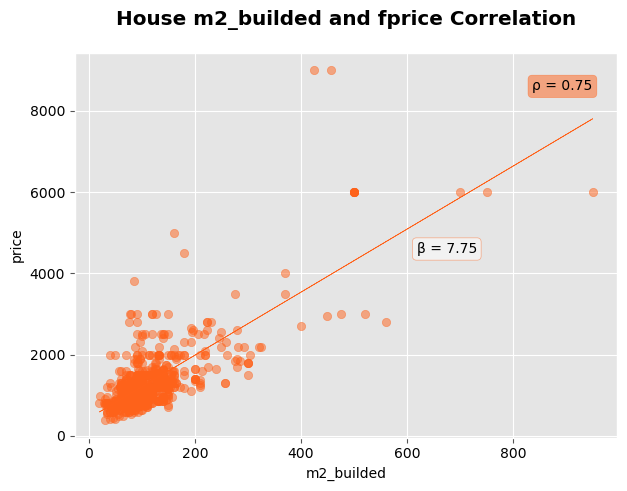

In [7]:
scatter_plot('m2_builded', 'price',b_x_adjustment= 200, r_y_adjustment = -500, save =True)

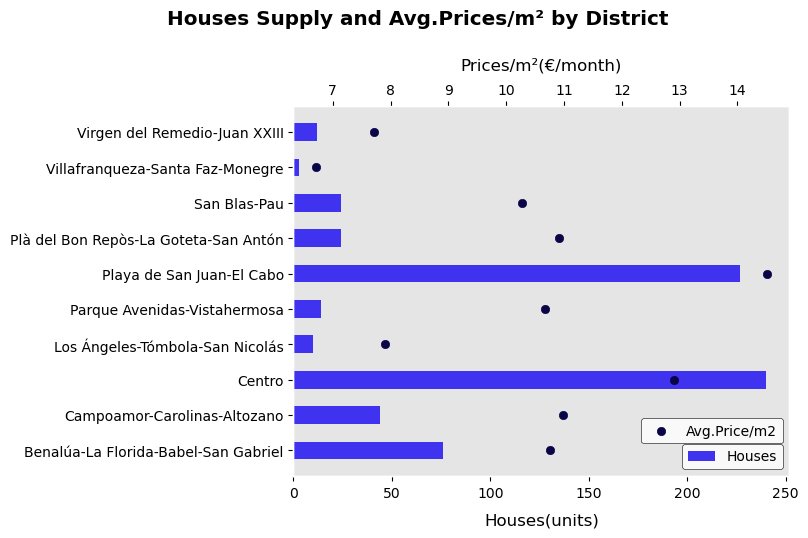

In [75]:
#Creating the subsidiary df

districts = df.groupby('district').agg({'idealista_id' : 'count', 'price_m2' : 'mean'})

    #In orther to make the grouped by df index a normal column and make it readable for the graph maker.
district = districts.round(2).reset_index()

    #Getting rid of the 'Distrito' part of the district name.
district['district'] = district['district'].str.replace(r'^\w+\s', '', regex = True)
    

#After setting the df, we summon the plot.

fig, ax1 = plt.subplots()

#Global variables

B_WIDTH = 0.5
X1 = district['district']
X2 = district['district']

#Default stylish

plt.style.use('ggplot')

#Bar graph

    #Plotting the bars
ax1.barh(X1, district['idealista_id'], height = B_WIDTH, label='Houses', color='#4033f0')

    #Other adjustments
ax1.legend(frameon=True,facecolor='white',edgecolor='black', loc='lower right')
ax1.set_xlabel('Houses(units)', color='black')
ax1.xaxis.set_label_coords(0.5,-0.1)
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.grid(False)

#Scatter plot

    #Setting the doble x axe
ax2 = ax1.twiny()

    #Ploting the dots
ax2.scatter(district['price_m2'],X2, marker='o', color = '#0a0547', label='Avg.Price/m2')

    #Other adjustments
ax2.legend(bbox_to_anchor=(1,0.175),frameon=True,facecolor='white',edgecolor='black')
ax2.set_xlabel('Prices/m²(€/month)', color='black')
ax2.xaxis.set_label_coords(0.5,1.1)
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')
ax2.grid(False)

#Other adjusments

title = plt.title('Houses Supply and Avg.Prices/m² by District',y=1.2, x=0.25,fontweight='bold')



plt.savefig('img/Houses Supply and Avg_Prices_per_m2 by District.png',bbox_inches='tight')
plt.show()

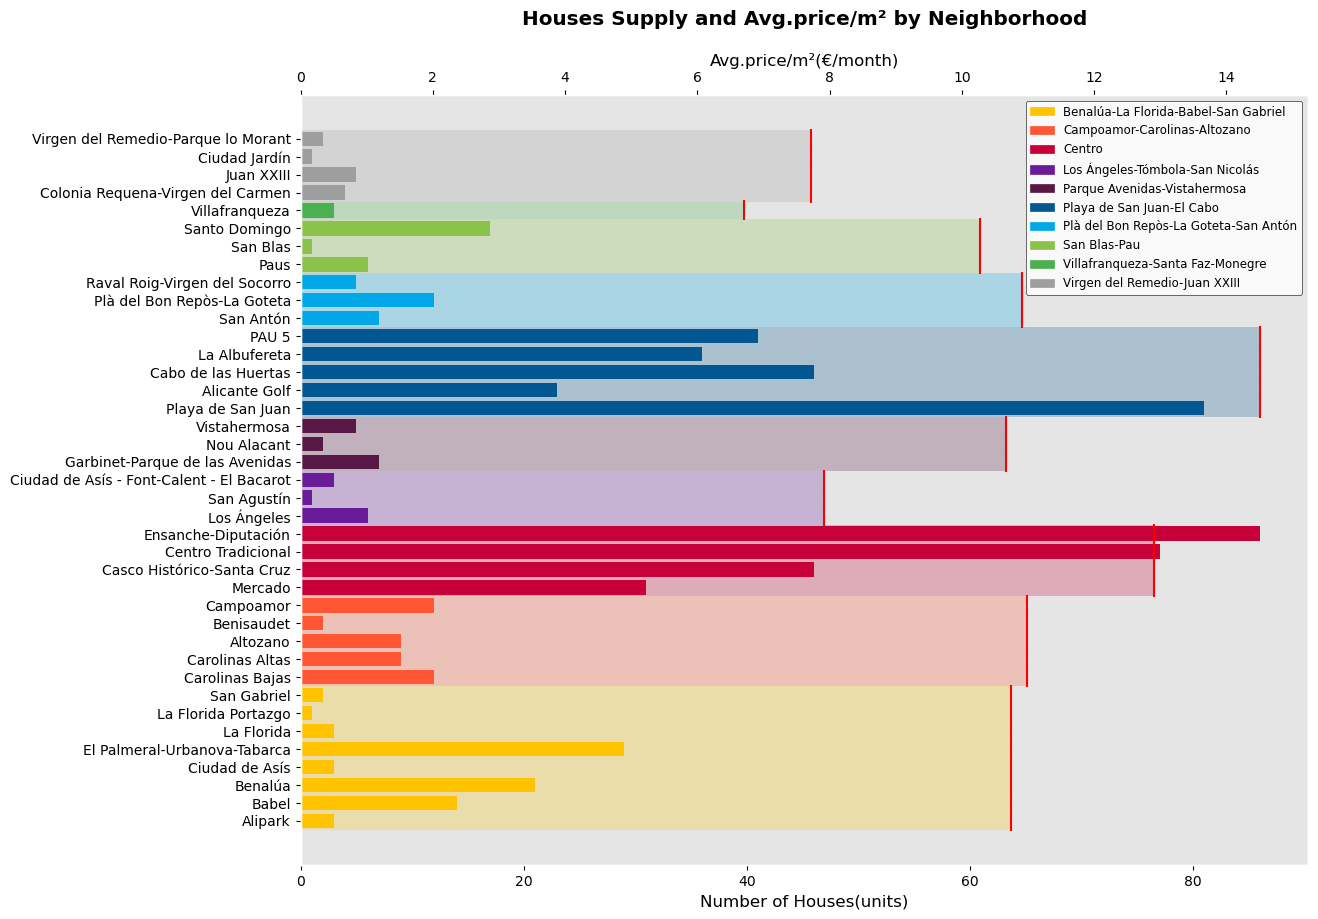

In [80]:
#Creating the subsidiary df

districts = df.groupby('district').agg({'idealista_id' : 'count', 'price_m2' : 'mean'})

    #In orther to make the grouped by df index a normal column and make it readable for the graph maker.
district = districts.round(2).reset_index()

    #Getting rid of the 'Distrito' part of the district name.
district['district'] = district['district'].str.replace(r'^\w+\s', '', regex = True)
    
    #Sorting values
district = district.sort_values(by='district')

#Creating the subsidiary df

location = df.groupby(['district','neighborhood']).agg({ 'price_m2' : 'mean',  'idealista_id':'count'}).reset_index()

    #Getting rid of the 'Distrito' part of the district name.
    #Getting rid of the 'Barrio' part of the neighborhhod name.
location['district'] = location['district'].str.replace(r'^\w+\s', '', regex = True)
location['neighborhood'] = location['neighborhood'].str.replace(r'^\w+\s', '', regex = True)
    
    #Sorting Values
location = location.sort_values(by = 'district')


    #We need to make a dictionary to map districts to colors
    #(did manually)
district_colors = {'Benalúa-La Florida-Babel-San Gabriel' : '#ffc300',
                   'Campoamor-Carolinas-Altozano': '#ff5733',
                  'Centro' : '#c70039',
                  'Los Ángeles-Tómbola-San Nicolás': '#6a1b9a',
                  'Parque Avenidas-Vistahermosa' : '#581845',
                  'Playa de San Juan-El Cabo' : '#005792',
                  'Plà del Bon Repòs-La Goteta-San Antón' : '#00a8e8',
                  'San Blas-Pau' : '#8bc34a',
                  'Villafranqueza-Santa Faz-Monegre' : '#4caf50',
                  'Virgen del Remedio-Juan XXIII' : '#9e9e9e'}

    #Same for average district price/m2s
    #(did by programing)
keys = [district for district in district['district']]
values =[price_m2 for price_m2 in district['price_m2']]
avg_dis_price_m2 = dict(zip(keys,values))

#Mapping the values

location['colors'] = location['district'].map(district_colors)
location['dis_avg_p'] = location['district'].map(avg_dis_price_m2)


#After setting the df, we summon the plot. 

fig, ax1 = plt.subplots(figsize=(13,10))

#Creating the legend figures

patch = []

for key, color in district_colors.items():
    patch.append(mpatches.Patch(color=f'{color}', label=f'{key}'))

#Default stylish

plt.style.use('ggplot')

#Bar graph

    #Plotting the bars
ax1.barh(location['neighborhood'],location['idealista_id'], color=location['colors'])

    #Other adjustments
ax1.set_xlabel('Number of Houses(units)', color='black')
ax1.tick_params(axis='x', colors='black')
ax1.tick_params(axis='y', colors='black')
ax1.grid(False)

#Scatter plot

    #Setting the doble x axe
ax2 = ax1.twiny()

    #Plotting the dots
ax2.barh(location['neighborhood'],location['dis_avg_p'], color=location['colors'],alpha = 0.25,height=1)
ax2.scatter(location['dis_avg_p'],location['neighborhood'], marker='|', s=200,color='red', label='Avg.price/m2')


    #Other adjustments
ax2.set_xlabel('Avg.price/m²(€/month)', color='black')
ax2.tick_params(axis='x', colors='black')
ax2.tick_params(axis='y', colors='black')
ax2.grid(False)


#Other adjustments

plt.legend(handles=patch,fontsize=8.5,loc='upper right', facecolor='white', edgecolor='black', frameon=True)
plt.title('Houses Supply and Avg.price/m² by Neighborhood', weight='bold', y = 1.08)



plt.savefig('img/Houses Supply and Avg_price_per_m2 by Neighborhood.png', bbox_inches='tight')
plt.show()

In [133]:
def prices_by_zones(zone_name, bar_color = '#3089e8',b_size = 0.75 , s_color = '#f9ad15', s_size = 50, save=False):
    
    #possible zones 'Benalúa-La Florida-Babel-San Gabriel','Campoamor-Carolinas-Altozano', 'Centro',
    # 'Los Ángeles-Tómbola-San Nicolás', 'Parque Avenidas-Vistahermosa','Playa de San Juan-El Cabo',
    # 'Plà del Bon Repòs-La Goteta-San Antón', 'San Blas-Pau', 'Villafranqueza-Santa Faz-Monegre',
    # 'Virgen del Remedio-Juan XXIII'
    
    zones = df.groupby(['district','neighborhood']).agg({ 'price_m2' : 'mean',  'idealista_id':'count'}).reset_index()
        
        #Getting rid of the 'Distrito' part of the district name.
        #Getting rid of the 'Barrio' part of the neighborhhod name.
    zones['district'] = zones['district'].str.replace(r'^\w+\s', '', regex = True)
    zones['neighborhood'] = zones['neighborhood'].str.replace(r'^\w+\s', '', regex = True)
    
    #We need to make a dictionary to map neighborhhod with district avg.price/m²
    #(did by programing)
    
    keys = [district for district in zones['district']]
    values =[zones[zones['district'] == f'{district}']['price_m2'].mean() for district in zones['district']]
    avg_dis_price_m2 = dict(zip(keys,values))

    #Mapping the values

    zones['dis_avg_p'] = zones['district'].map(avg_dis_price_m2)
    
    #Creatiing the specifict df
    
    zone = zones[zones['district'] == f'{zone_name}']
    
    #Ploting bars and plots
    
    plt.bar(zone['neighborhood'], zone['price_m2'], label='Neighborhood', width=b_size,color = bar_color)
    plt.scatter(zone['neighborhood'], zone['dis_avg_p'], marker = 'o', s=s_size, label='District', color = s_color)   

    #Other adjustments
    
    plt.xticks(zone['neighborhood'], rotation=45, ha='right', color = 'black')
    plt.yticks(color = 'black')
    plt.legend(fontsize=8,loc='center left', bbox_to_anchor=(1,0.95),facecolor='white', edgecolor='black', frameon=True)
    plt.title(f'{zone_name} average prices/m²', y = 1.075, weight = 'bold')
    
    if save:
        
        plt.savefig(f'img/Rents_Histogram_of_{column_name}.png', bbox_inches='tight')

    plt.show()


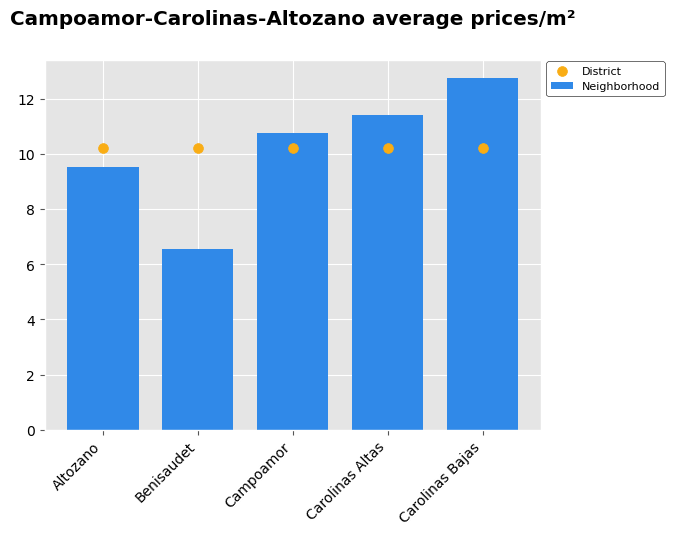

In [134]:
prices_by_zones('Campoamor-Carolinas-Altozano')

In [72]:
def histogram(column_name, bins = 10 ,color='#0dd9fd', area ='#0dd9fd', edgecolor ='#0296b1',save = False):

    fig, ax1 = plt.subplots()

    #Default stylish

    plt.style.use('ggplot')

    #Setting the outsites

    ax1.hist(df[f'{column_name}'],bins=bins,alpha = 0)
    ax1.set_ylabel('Frequency', color='black')
    ax1.set_xlabel(f'{column_name}', color='black')
    ax1.tick_params(axis='x', colors='black')
    ax1.tick_params(axis='y', colors='black')

    #Histogram

    ax2 = ax1.twinx()
    ax2.hist(df[f'{column_name}'], bins=bins, color=color, density=True)

        # Plot KDE
    sns.kdeplot(df[f'{column_name}'], fill=True, alpha = 0.5, color=area, edgecolor= edgecolor, linewidth=1)

    #Other adjustments
    plt.title(f'Rents Histogram\n({column_name})', weight='bold')
    ax2.set_ylabel('')
    ax2.set_yticks([])


    if save:
        
        plt.savefig(f'img/Rents_Histogram_of_{column_name}.png', bbox_inches='tight')
        
    plt.show()

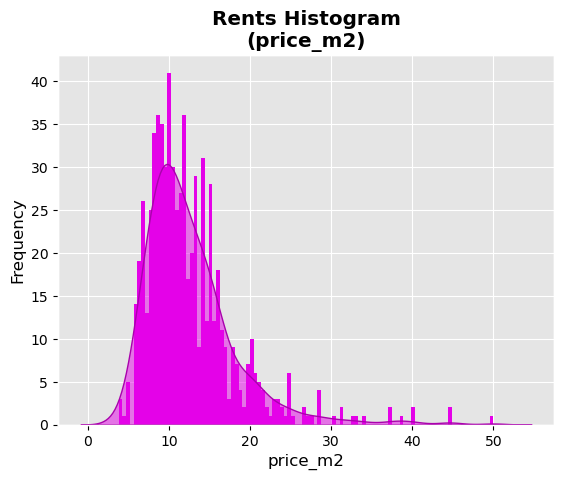

In [73]:
histogram('price_m2', bins=100, color='#e402e8', area ='#e402e8', edgecolor ='#a902ac', save=True)

In [151]:

def pie_chart(column_name,color_no = '#42efff', color_yes = '#ff7070', save = False):

    #Quartiles and segmentation
    
    q1 = df['price'].quantile(0.25)# First Quartile.
    q2 = df['price'].quantile(0.5)# Second Quartile, equal to the median.
    q3 = df['price'].quantile(0.75)# Third Quartile.

    _1th = df[df['price'] <= q1 ]# Cheapest houses
    _2th = df[(df['price'] > q1) & (df['price'] <=q2)]# Second cheapests
    _3th = df[(df['price'] > q2) & (df['price'] <=q3)]# Second most expensive
    _4th = df[df['price'] > q3 ]# Most expensive
    
    #Creating the subsidiaries df

    sp_global = df.groupby(f'{column_name}').agg({'idealista_id':'count'})
    sp_global = sp_global.reset_index()

    sp_25 = _1th.groupby(f'{column_name}').agg({'idealista_id':'count'})
    sp_25 = sp_25.reset_index()

    sp_25_50 = _2th.groupby(f'{column_name}').agg({'idealista_id':'count'})
    sp_25_50 = sp_25_50.reset_index()

    sp_50_75 = _3th.groupby(f'{column_name}').agg({'idealista_id':'count'})
    sp_50_75 = sp_50_75.reset_index()

    sp_75_ = _4th.groupby(f'{column_name}').agg({'idealista_id':'count'})
    sp_75_ = sp_75_.reset_index()

    #After setting the df, we summon the plot

        #Graph structure
    fig, axs = plt.subplot_mosaic([['1', '1','2', '3'], ['1','1', '4','5']])

    #Global variables

    COLORS = [f'{color_no}', f'{color_yes}']
    MYEXPLODE = [0.15, 0]

    #Default stylish

    plt.style.use('ggplot')

    #Big pie chart

    axs['1'].pie(sp_global['idealista_id'],autopct='%1.1f%%', startangle=90, colors=COLORS, explode = MYEXPLODE,shadow=True,textprops={'fontsize': 10})
    axs['1'].set_title('Global', y=0.95, fontsize=20)
    
    
    #Samlls pie charts

        #Upper left
    axs['2'].pie(sp_25['idealista_id'], autopct='%1.1f%%', startangle=90,colors=COLORS,explode = MYEXPLODE,shadow=True, textprops={'fontsize' : 7})
    axs['2'].set_title('Cheapest prices\n(0th to 25th percentil)', fontsize=7.5)
    
        #Upper right
    axs['3'].pie(sp_25_50['idealista_id'], autopct='%1.1f%%', startangle=90,colors=COLORS,explode = MYEXPLODE,shadow=True, textprops={'fontsize' : 7})
    axs['3'].set_title('Second cheapests\n(25th to 50th percentil)', fontsize=7.5)

        #Lower left
    axs['4'].pie(sp_50_75['idealista_id'], autopct='%1.1f%%', startangle=90,colors=COLORS,explode = MYEXPLODE,shadow=True, textprops={'fontsize' : 7})
    axs['4'].set_title('Second most expensives\n(50th to 75th percentil)', fontsize=7.5)

        #Lower right
    axs['5'].pie(sp_75_['idealista_id'], autopct='%1.1f%%', startangle=90,colors=COLORS,explode = MYEXPLODE,shadow=True, textprops={'fontsize' : 7})
    axs['5'].set_title('Most expensive prices\n(75th to 100th percentil)', fontsize=7.5)


    #Other adjustments
    plt.legend(['No','Yes'], bbox_to_anchor=(-3,0.25),facecolor='white',frameon=True,edgecolor='black')
    plt.suptitle(f'Percentage of Houses with {column_name}', fontsize=15, weight='bold', y=1)


    if save:
        plt.savefig(f'img/% of Houses with{column_name}.png', bbox_inches='tight')
        
    plt.show()
    


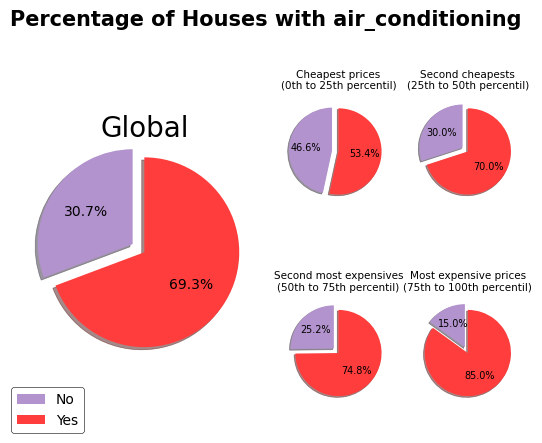

In [150]:
pie_chart('air_conditioning',color_yes='#ff3d3d', color_no='#b293cd')

In [139]:
def stacked_bar_chart(column_name, color_no = '#42efff', color_yes = '#ff7070', save = False, district = True):
    
    if district:

        #Cerating the subsidiaries df

        binary = df.groupby(['district',f'{column_name}']).agg({'idealista_id':'count'}).reset_index()
        tbinary = df.groupby('district').agg({'idealista_id':'count'}).reset_index()

            #Getting rid of the 'Distrito' part of the district name.
        binary['district'] = binary['district'].str.replace(r'^\w+\s', '', regex = True)
        tbinary['district'] = tbinary['district'].str.replace(r'^\w+\s', '', regex = True)

        ybinary = binary[binary[f'{column_name}'] == 'Y']


        #After setting the df, we summon the plot


        fig, ax1 = plt.subplots()


        ax1.barh(tbinary['district'], tbinary['idealista_id'], label='No', color=f'{color_no}')
        ax1.barh(ybinary['district'], ybinary['idealista_id'], label='Yes', color=f'{color_yes}')
        ax1.tick_params(axis='x', colors='black')
        ax1.tick_params(axis='y', colors='black')
        ax1.set_xlabel('Houses(units)', color='black')


        plt.legend(frameon=True,facecolor='white',edgecolor='black')
        plt.title(f'Houses with {column_name} by Districts', y = 1.08, weight='bold')

        if save:
            plt.savefig(f'img/Houses with {column_name} by Districts.png', bbox_inches='tight')

        plt.show()
    
    else:
        
        #Cerating the subsidiaries df

        g_n_zones = df.groupby(['district','neighborhood',f'{column_name}']).agg({'idealista_id':'count'}).reset_index()
        tg_n_zones = df.groupby(['district','neighborhood']).agg({'idealista_id': 'count'}).reset_index()

            #Getting rid of the 'Distrito' part of the district name.
        g_n_zones['district'] = g_n_zones['district'].str.replace(r'^\w+\s', '', regex = True)
        tg_n_zones['district'] = tg_n_zones['district'].str.replace(r'^\w+\s', '', regex = True)

            #Getting rid of the 'Barrio' part of the neighborhhod name. 
        g_n_zones['neighborhood'] = g_n_zones['neighborhood'].str.replace(r'^\w+\s', '', regex = True)
        tg_n_zones['neighborhood'] = tg_n_zones['neighborhood'].str.replace(r'^\w+\s', '', regex = True)


        yg_n_zones = g_n_zones[g_n_zones[f'{column_name}'] == 'Y']


        #After setting the df, we summon the plot

        fig, ax1 = plt.subplots(figsize= (13,10))

        #Bar graph 

        ax1.barh(tg_n_zones['neighborhood'],tg_n_zones['idealista_id'],label='No',color=f'{color_no}')
        ax1.barh(yg_n_zones['neighborhood'], yg_n_zones['idealista_id'], label='Yes', color=f'{color_yes}')
        ax1.tick_params(axis='x', colors='black')
        ax1.tick_params(axis='y', colors='black')
        ax1.set_xlabel('Houses(units)', color='black')


        plt.style.use('ggplot')
        plt.legend(frameon=True,facecolor='white',edgecolor='black')
        plt.title(f'Houses with {column_name} by Neighborhoods', y = 1.08, weight='bold')
        
        if save:
            plt.savefig(f'img/Houses with {column_name} by Neighborhoods.png', bbox_inches='tight')
                
        plt.show()
        
        


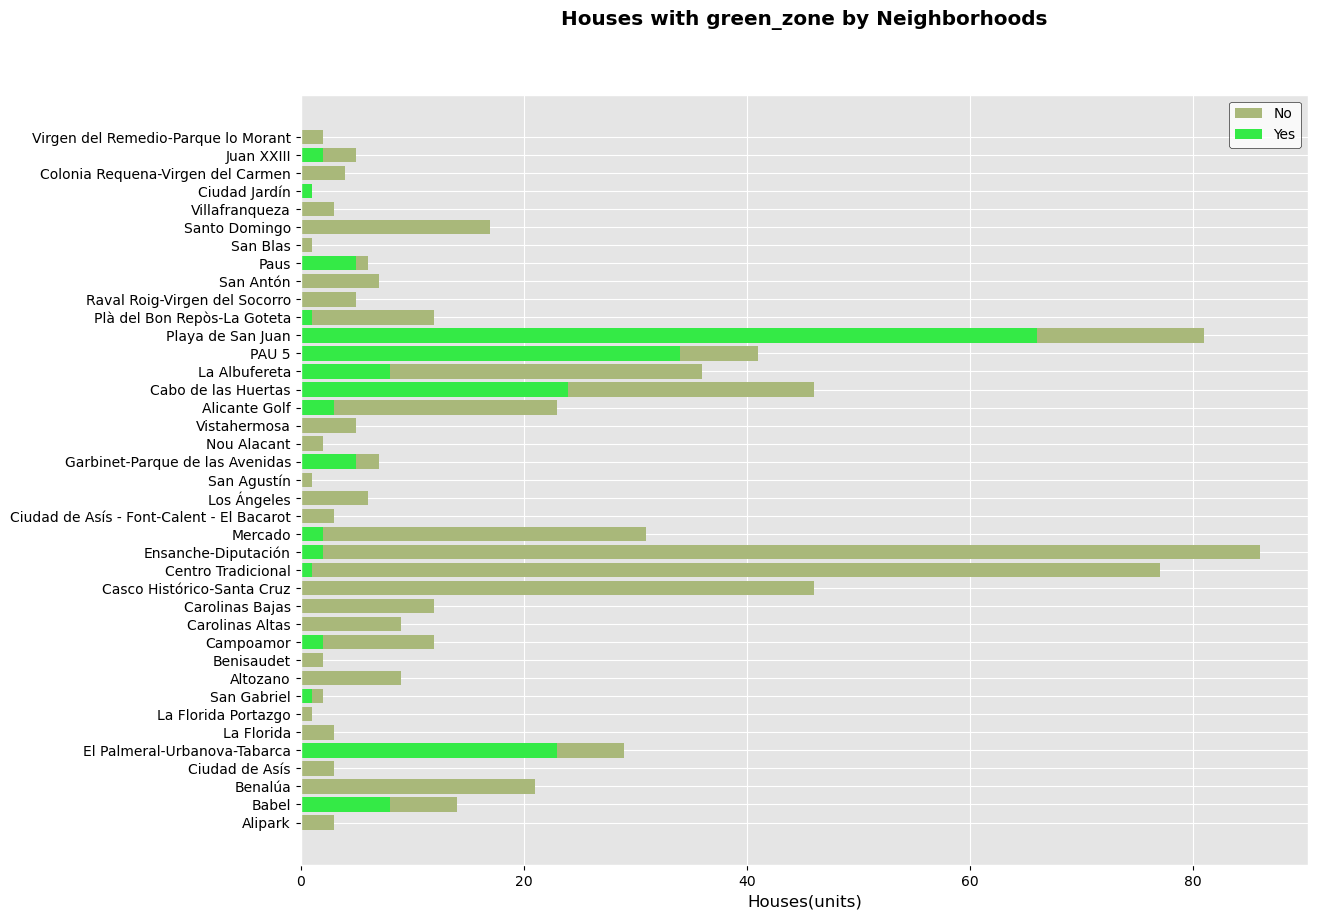

In [140]:
stacked_bar_chart('green_zone', color_no = '#a9b87a', color_yes = '#34ea46', district = False)